# Image Classification using Naive Bayes Classifier

## About the Project

A simple model is developed to classify the handwritten digits on images by applying Bayes' theorem. 

For a given image of size 28 pixels by 28 pixels, there will be a total of 784 pixels used to illustrate the image. These 784 pixels would then contain a value to indicate if it is bright or dark. As such, the joint probability is shown in the equation below, where c represents the digit in the image and X represents each pixel:

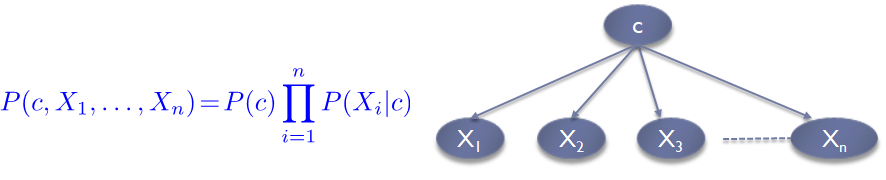


Applying Bayes' rule to the above joint probability, we get the following:
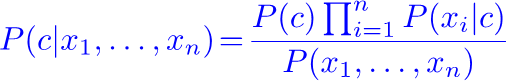

The model would thus compute the probability of each class, ie c = 0, c = 1, ... , c = 9 given the pixel values and the digit is predicted based on the highest computed probability. 

With this simple model, an accuracy of 83.75% was achieved. 

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Load and Explore Data

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
print(f"Given dataset has a shape of {data.shape}.")

Given dataset has a shape of (42000, 785).


The given dataset has 42000 images, where information of each image is stored in each row of the data. The "label" column indicates the digit shown on the image. The remaining 784 columns contain values representing the lightness or darkness of the 784 pixels making up each image of size 28 pixels by 28 pixels. A value of 0 represents bright while the max value of 255 represents dark. 

Let's extract samples from the dataset to visualise the images.

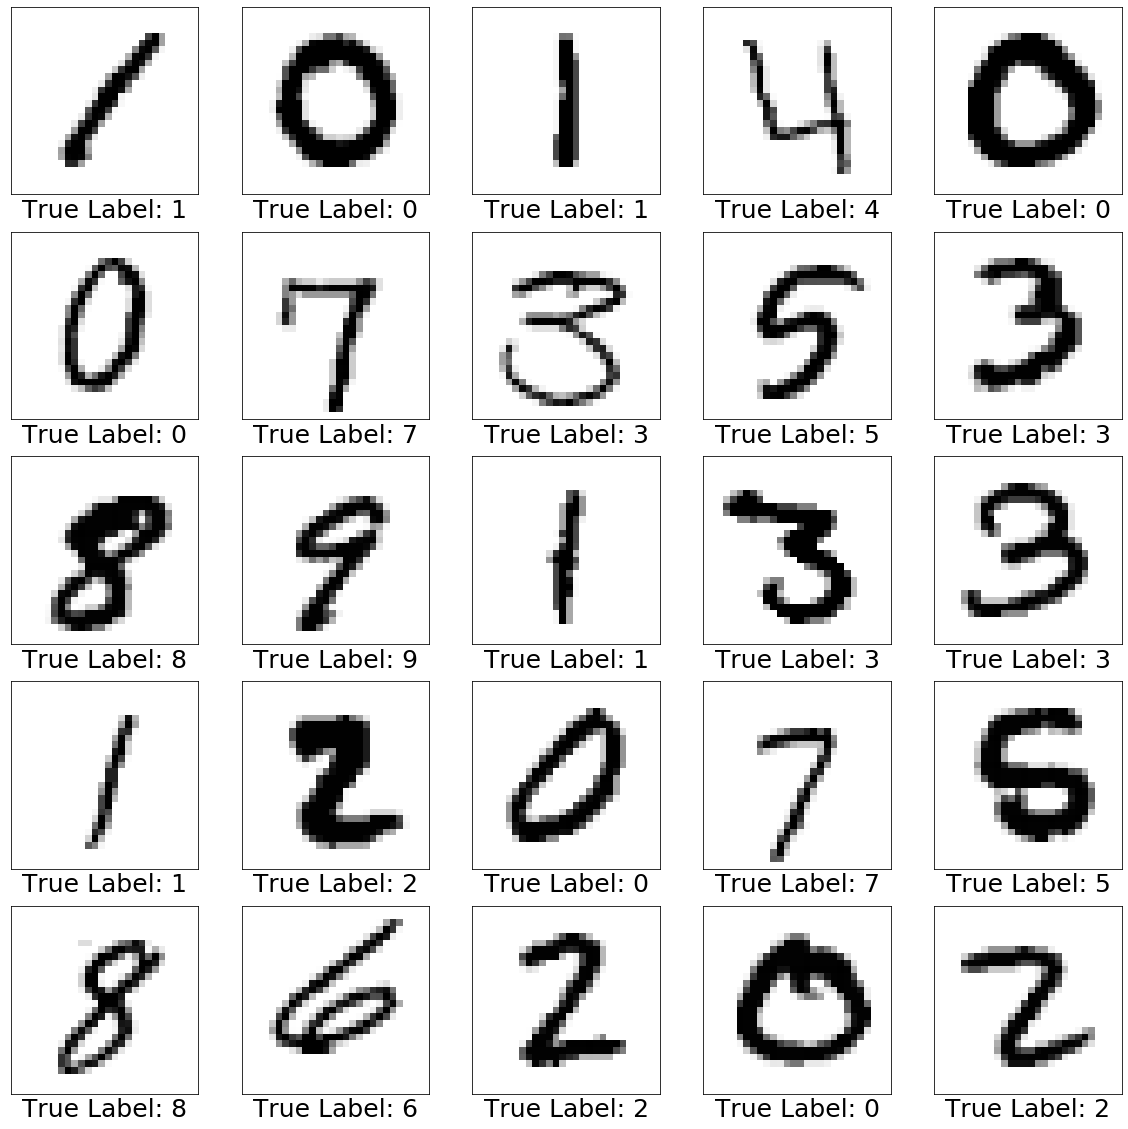

In [6]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data.iloc[i,1:].to_numpy().reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xlabel(f'True Label: {data.iloc[i,0]}', fontsize=25)
plt.show()

From the images above, the variation in writing the same digit can be seen. To further illustrate this, let's take a look at the various images representing the digit '6' in the given data.

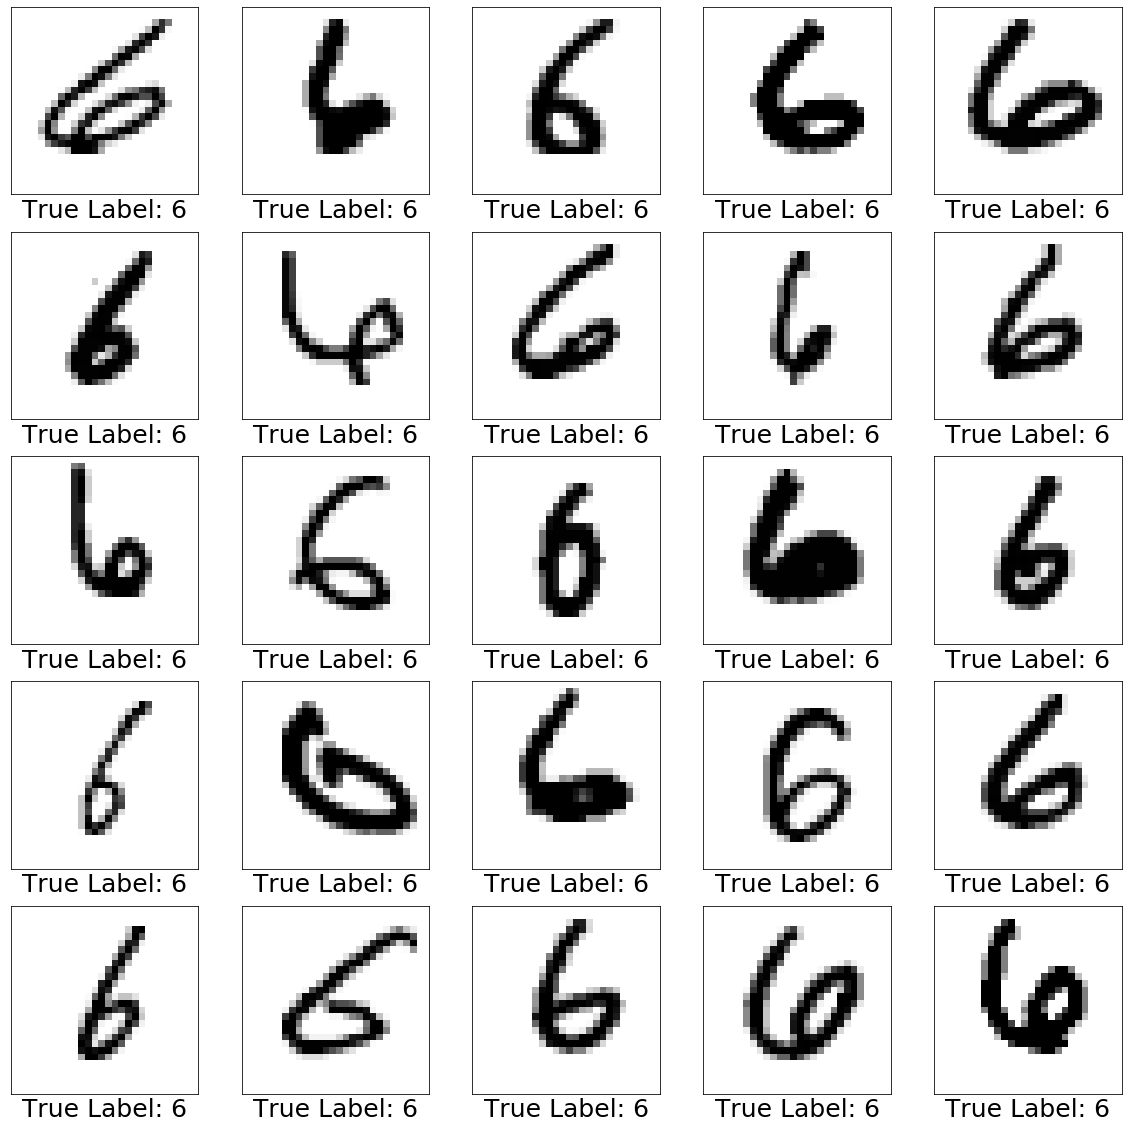

In [7]:
six = data[data["label"]==6]
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(six.iloc[i,1:].to_numpy().reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xlabel(f'True Label: {six.iloc[i,0]}', fontsize=25)
plt.show()

As seen above, some of the images are not so clearly written and it is not immediately obvious that it is "6".  

Now, let's take a look at the distribution of the digits in the data first. 

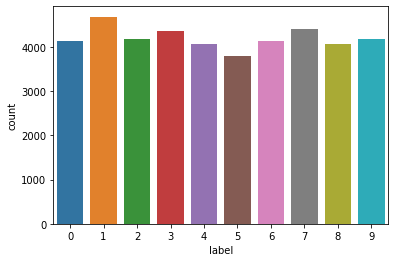

In [8]:
sns.countplot(data.label)

As seen above, there is generally rather balanced distribution of images representing the 10 digits. 

## Developing Naive Bayes Model 

In [9]:
train, val = train_test_split(data, random_state=88)
print(f"Training dataset has a shape of {train.shape} and validation dataset has a shape of {val.shape}")

Training dataset has a shape of (31500, 785) and validation dataset has a shape of (10500, 785)


In [10]:
X_train = train.drop('label', axis=1)
X_val = val.drop('label', axis=1)
y_train = train.label
y_val = val.label
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"A simple Naive Bayes classifier model has achieved an accuracy of {accuracy_score(y_val,y_pred)*100:.2f}%.")

A simple Naive Bayes classifier model has achieved an accuracy of 83.75%.


## Evaluating Model
Let's examine the top 25 incorrect predictions made by the model. As illustrated below, the model would calculate the probability of an image representing each digit and the predicted label would be the digit with the highest computed probability. 

Probability of image representing digit '0': 1.2648387343843812e-118
Probability of image representing digit '1': 1.0
Probability of image representing digit '2': 8.198062543887077e-63
Probability of image representing digit '3': 4.600465339212269e-67
Probability of image representing digit '4': 3.1477990538747676e-81
Probability of image representing digit '5': 2.872964489676832e-60
Probability of image representing digit '6': 2.1403301966888598e-85
Probability of image representing digit '7': 3.2518462152723763e-83
Probability of image representing digit '8': 2.074974923289259e-62
In this instance, the highest probability is that the image shows digit 1 and the actual label is indeed 1 as verified by the image below.


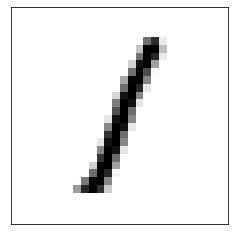

In [11]:
pred_prob = model.predict_proba(X_val)
for i,j in zip(pred_prob[2],range(9)):
    print(f"Probability of image representing digit '{j}': {i}")
print(f"In this instance, the highest probability is that the image shows digit {np.argmax(pred_prob[2])} and the actual label is indeed {y_val.iloc[2]} as verified by the image below.")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_val.iloc[2].to_numpy().reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()

As such, we can extract the computed probability of the actual class for each image and sort them. The top errors would then be those with the lowest probabilities.

In [12]:
prob = []
for i in range(10500):
    j = y_val.iloc[i]               #to extract the actual class
    prob.append(pred_prob[i,j])     #to extract the computed probability of the actual class

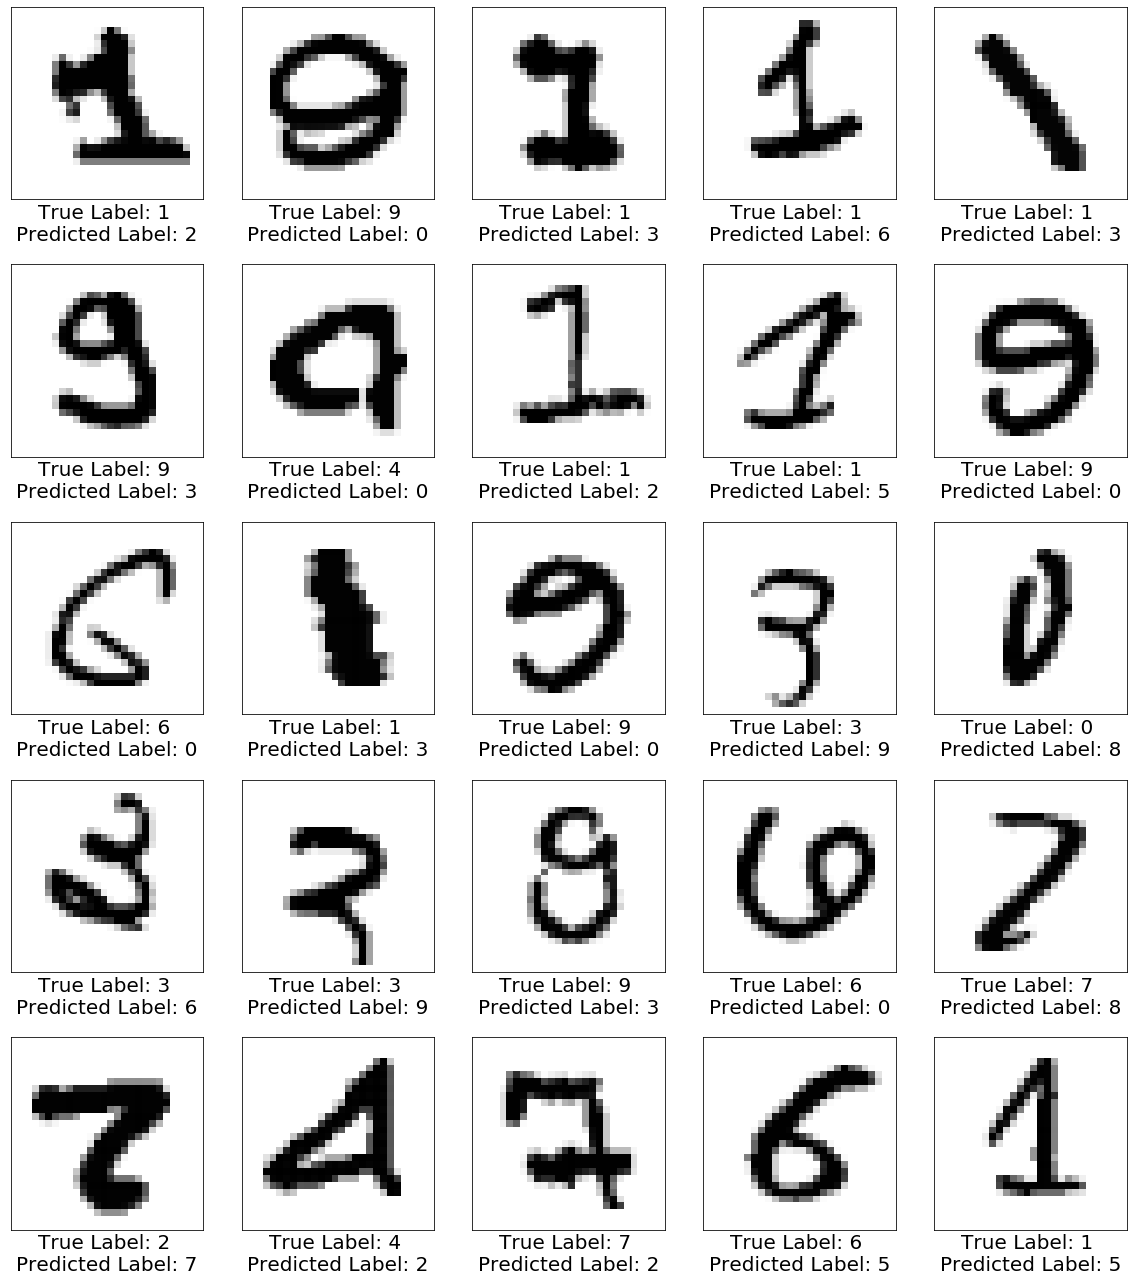

In [13]:
results = val.copy(deep=True)
results['probability'] = prob
results['predicted'] = y_pred
results = results.sort_values(by='probability')
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(top = 0.99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(results.iloc[i,1:-2].to_numpy().reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xlabel(f'True Label: {results.iloc[i,0]} \nPredicted Label: {results.iloc[i,-1]}', fontsize=20)
plt.show()

As seen above, it is indeed difficult even for a human to correctly recognise the digits shown. As shown below, the model had the most errors with images representing the digit "5" in the validation set.  

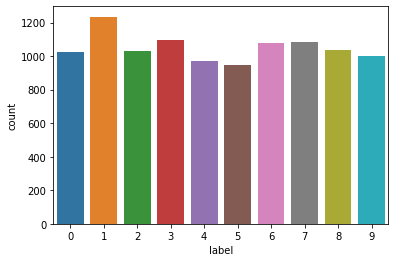

In [14]:
sns.countplot(results['label'])

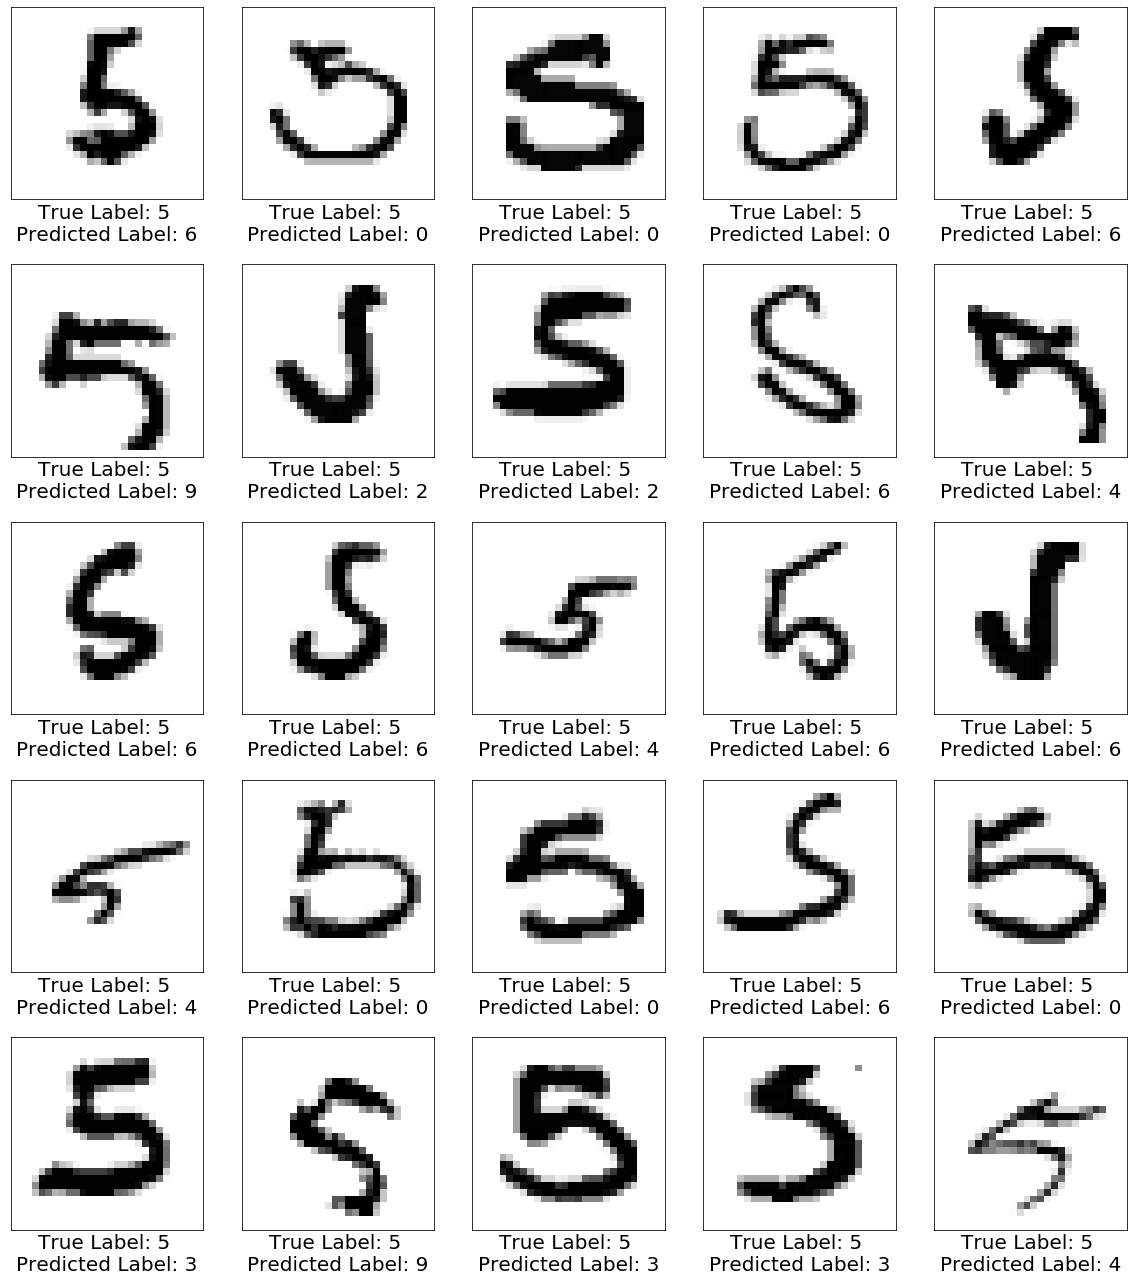

In [15]:
five = results[results["label"]==5]
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(top = 0.99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(five.iloc[i,1:-2].to_numpy().reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xlabel(f'True Label: {five.iloc[i,0]} \nPredicted Label: {five.iloc[i,-1]}', fontsize=20)
plt.show()